# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [4]:
experimentN = 'exp2'

In [5]:
%%time
path = input_file_directory + "mefs/mefs_seahorse_data/ocr/experiment_2/normalized/ocr_2expNorm.csv"
ocr_normalized = pandas.read_csv(path, sep = ";")
ocr_normalized = ocr_normalized.rename(columns = {'Unnamed: 0':'Time'})
ocr_normalized = ocr_normalized.apply(lambda x: x.str.replace(',','.'))
ocr_normalized = ocr_normalized.astype(float)
print(ocr_normalized.shape)
ocr_normalized.head(2)

(15, 61)
Wall time: 29 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.31,369.33,303.48,172.59,221.38,400.53,252.40,385.88,321.52,443.53,...,424.15,456.79,453.70,382.75,284.09,325.37,251.50,265.65,272.67,275.58
1,7.76,345.78,269.93,167.88,207.58,379.53,236.68,342.77,297.65,403.89,...,388.68,427.86,422.87,354.51,267.57,309.87,239.12,249.10,260.75,255.34


In [6]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

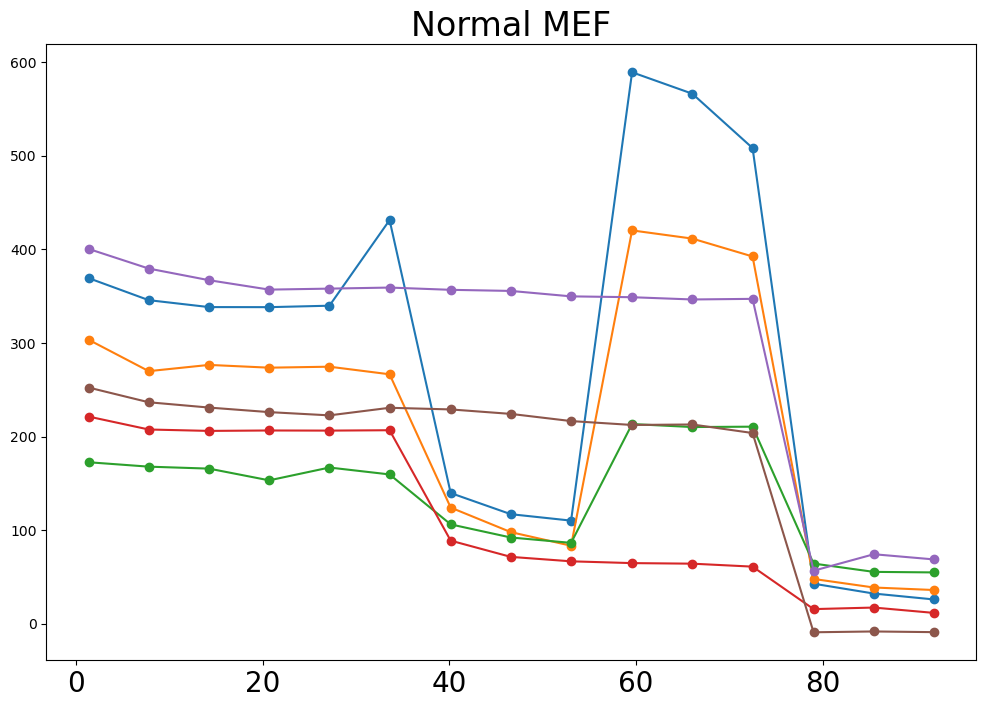

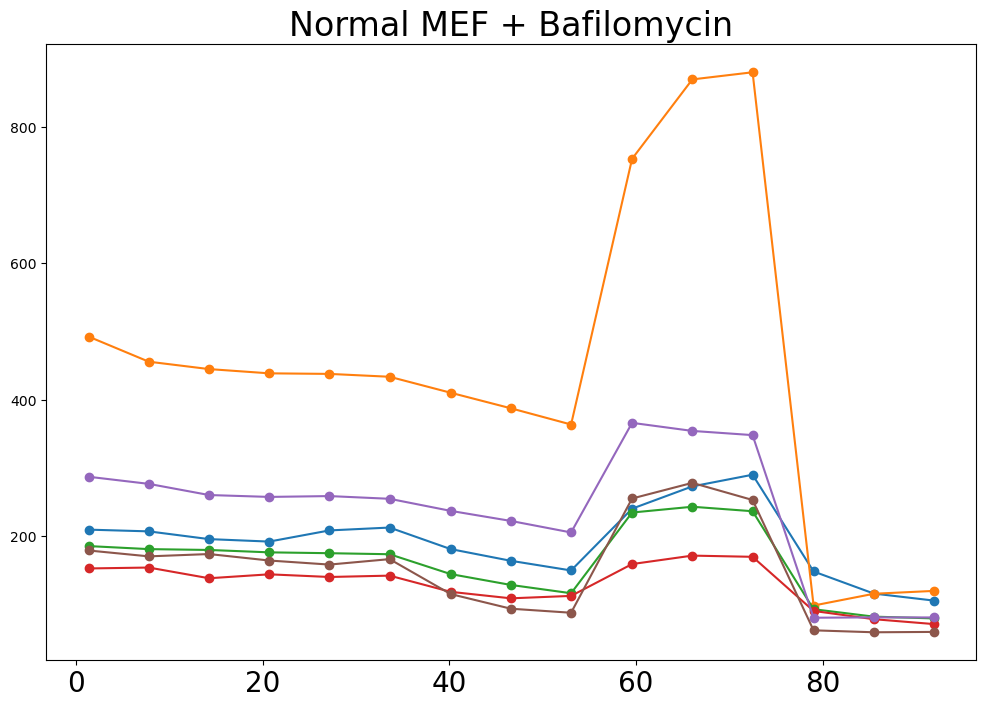

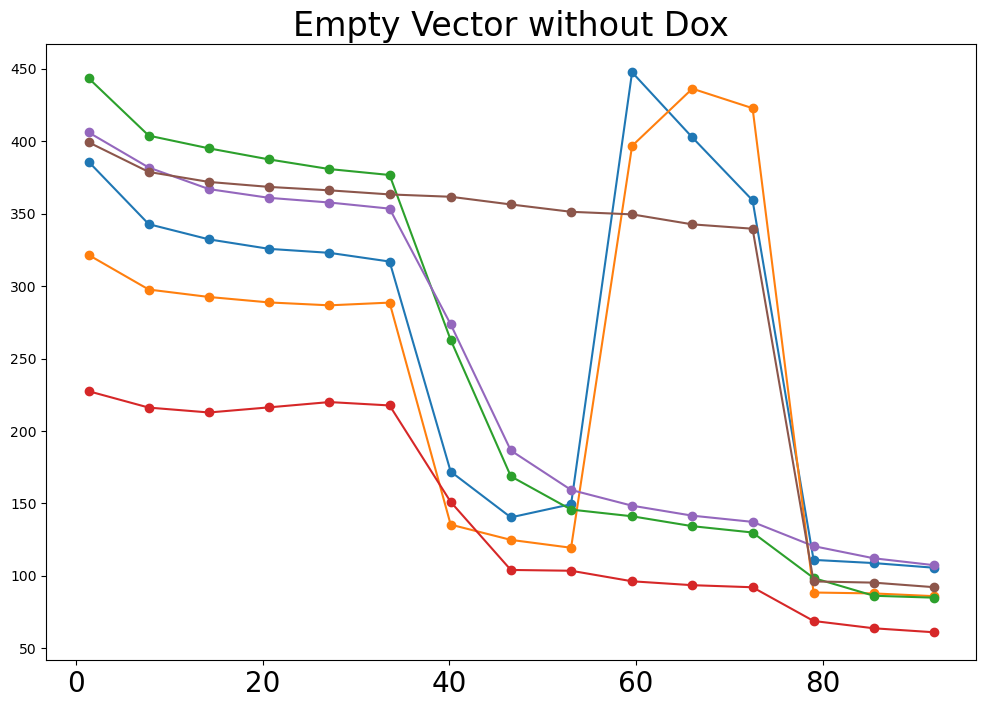

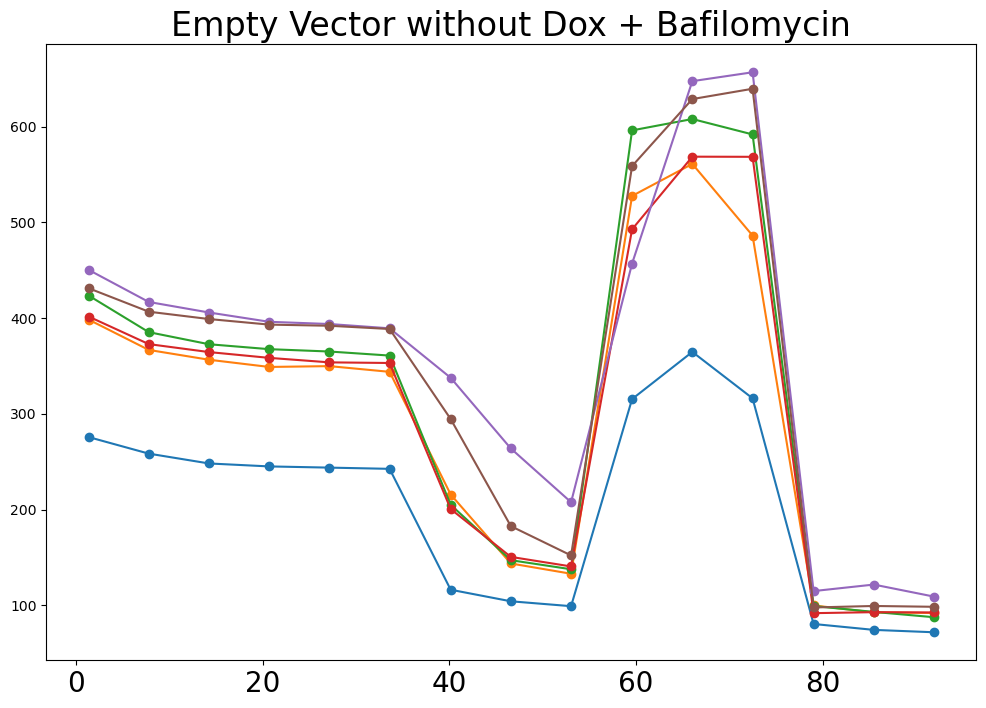

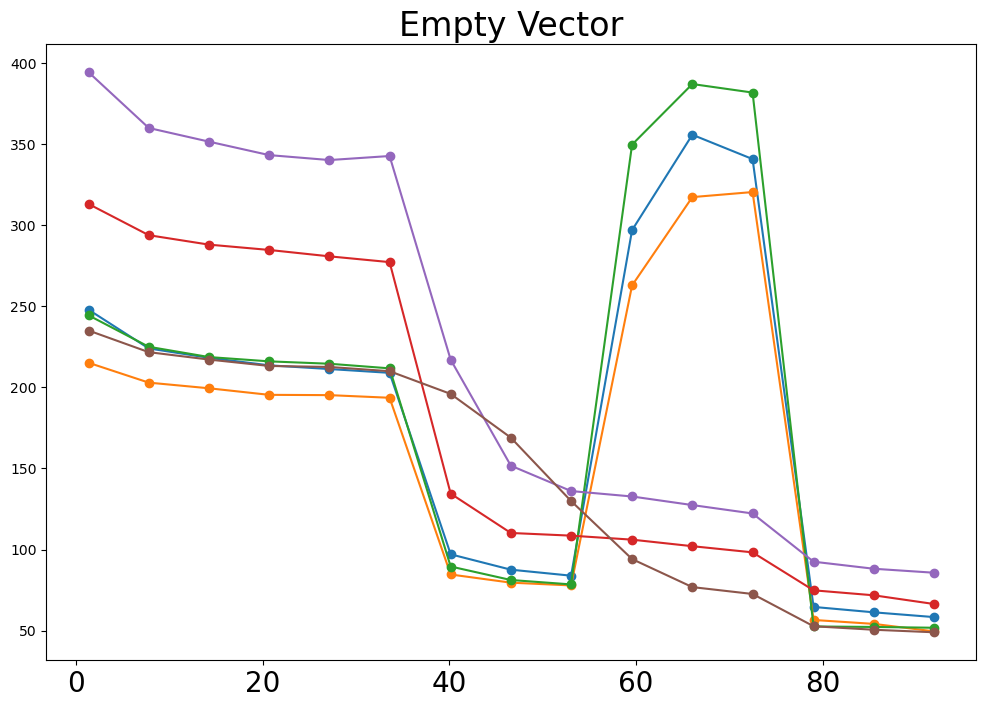

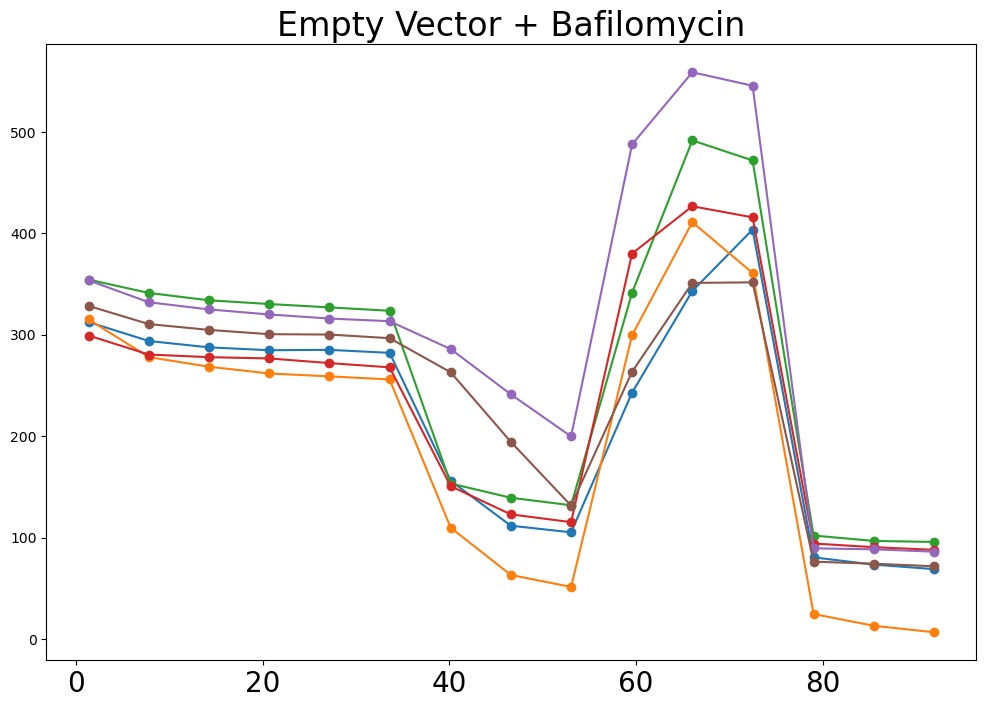

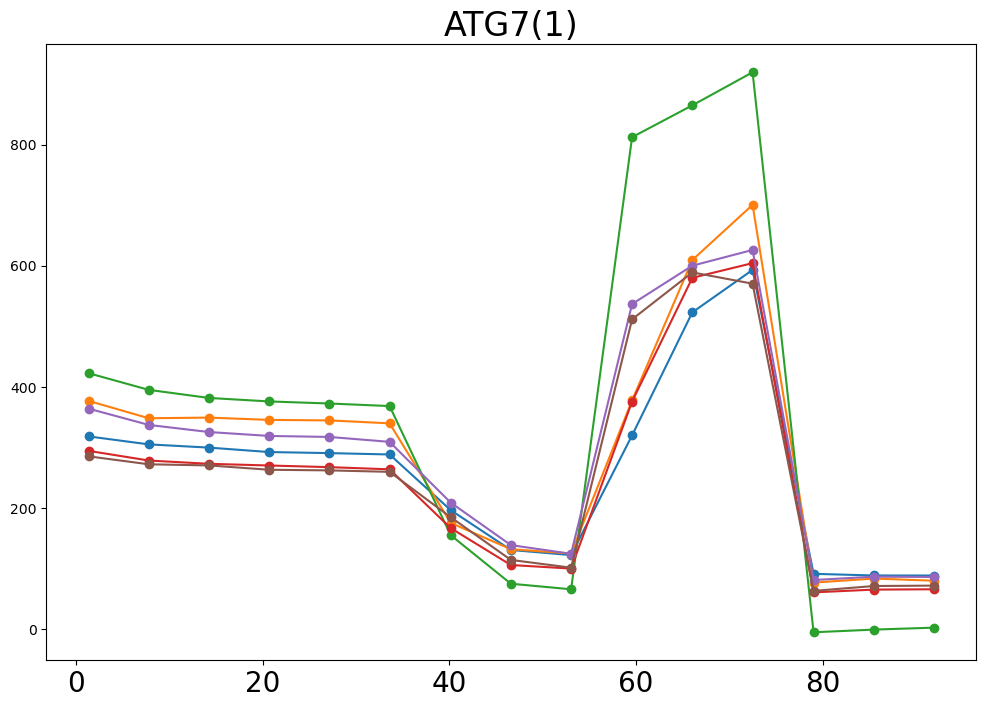

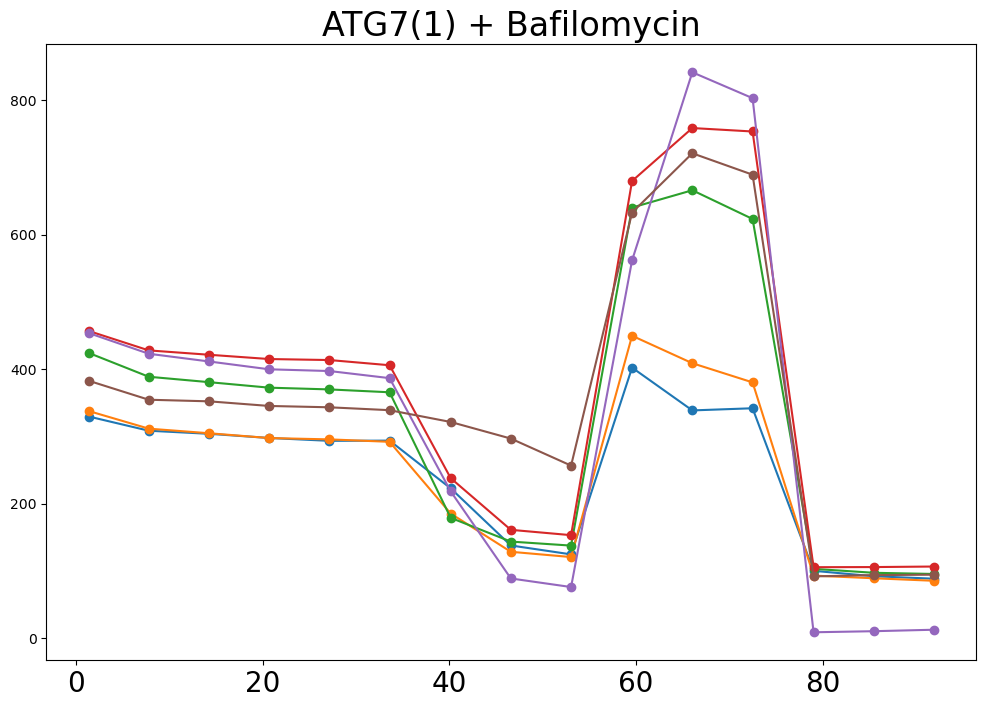

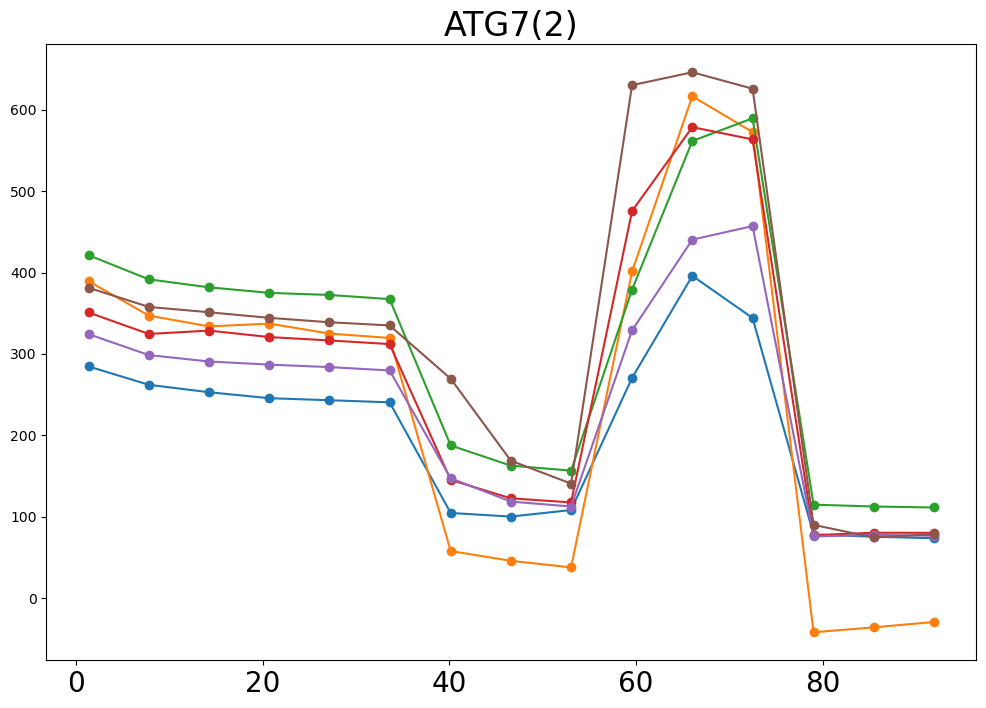

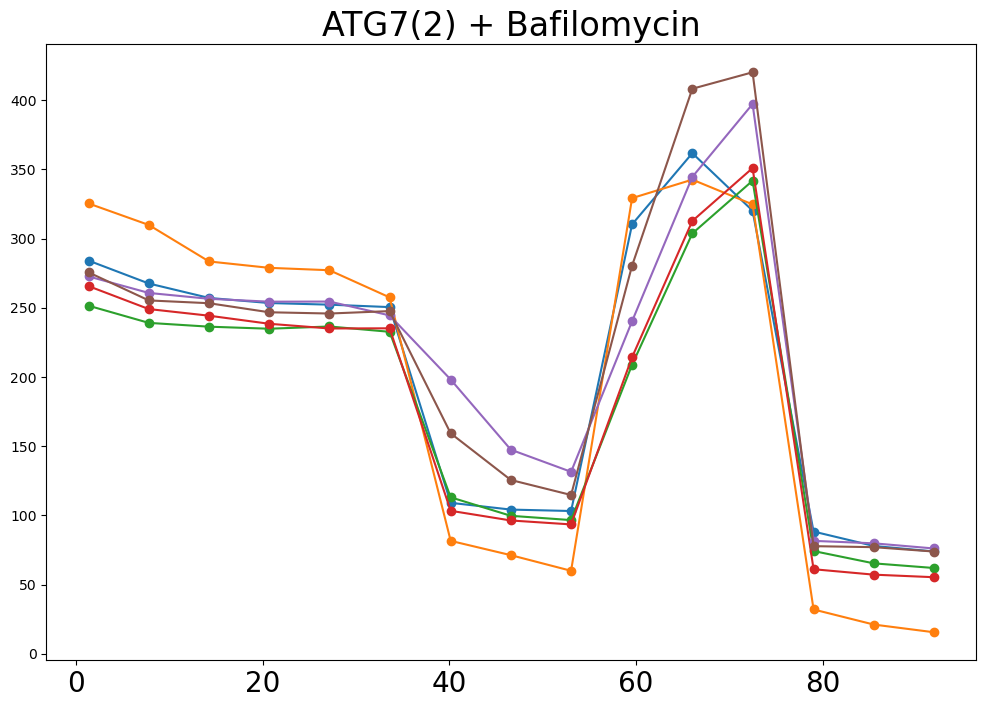

<Figure size 1200x800 with 0 Axes>

In [7]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ocr_normalized['Time'], ocr_normalized[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [8]:
#define the wells for each condition after removing bad wells 
normal = ['B02','C02','D02']
ev_nodox = ['B03','C03']
ev = ['B04','C04','D04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10']
wt2_baf = ['B11','D11','E11','F11','G11']

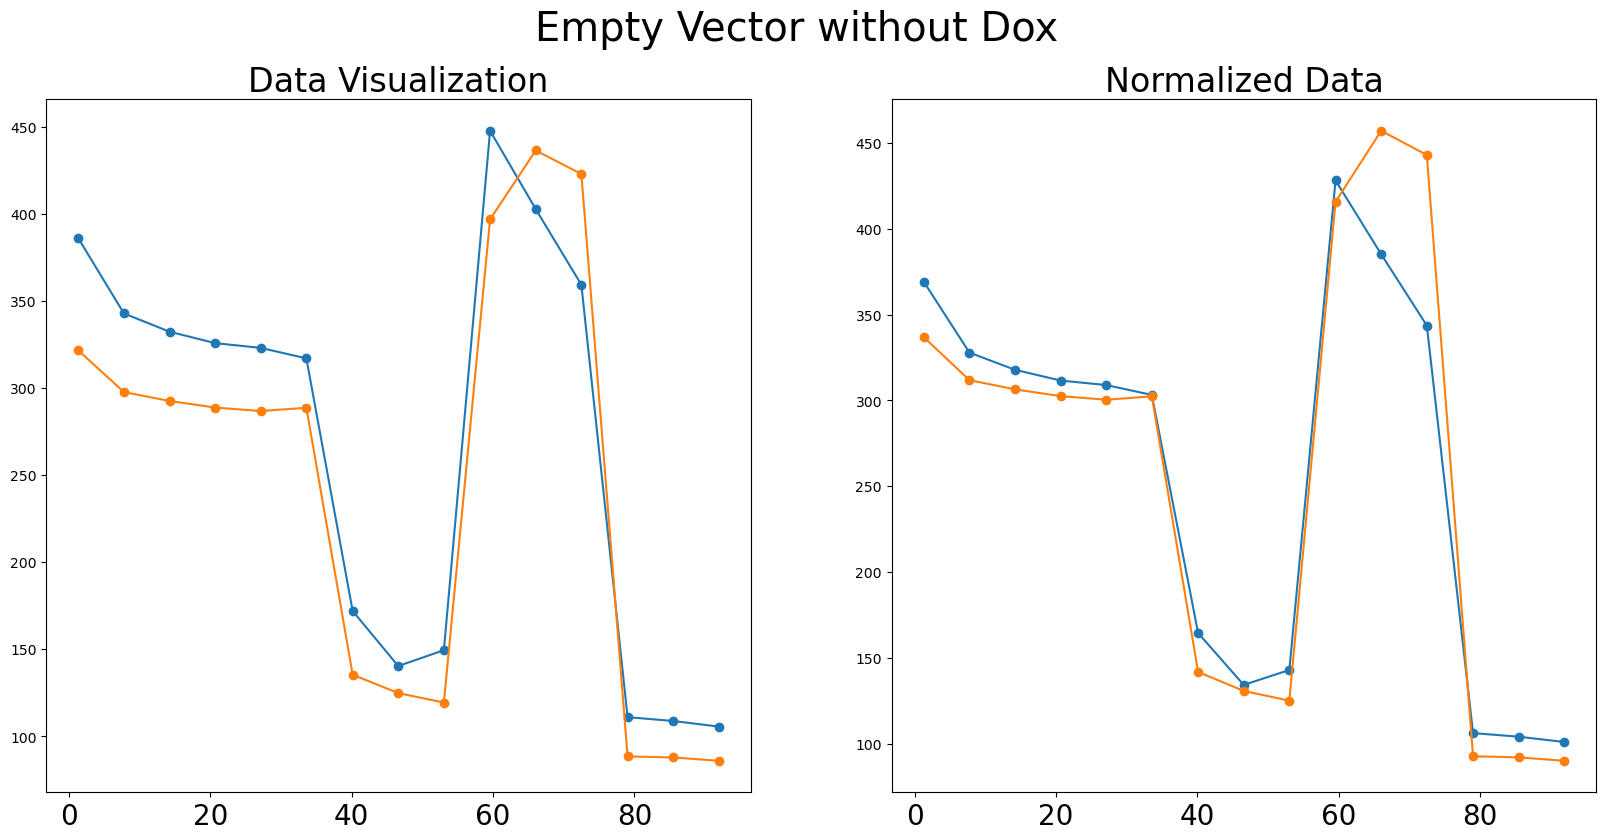

<Figure size 1200x800 with 0 Axes>

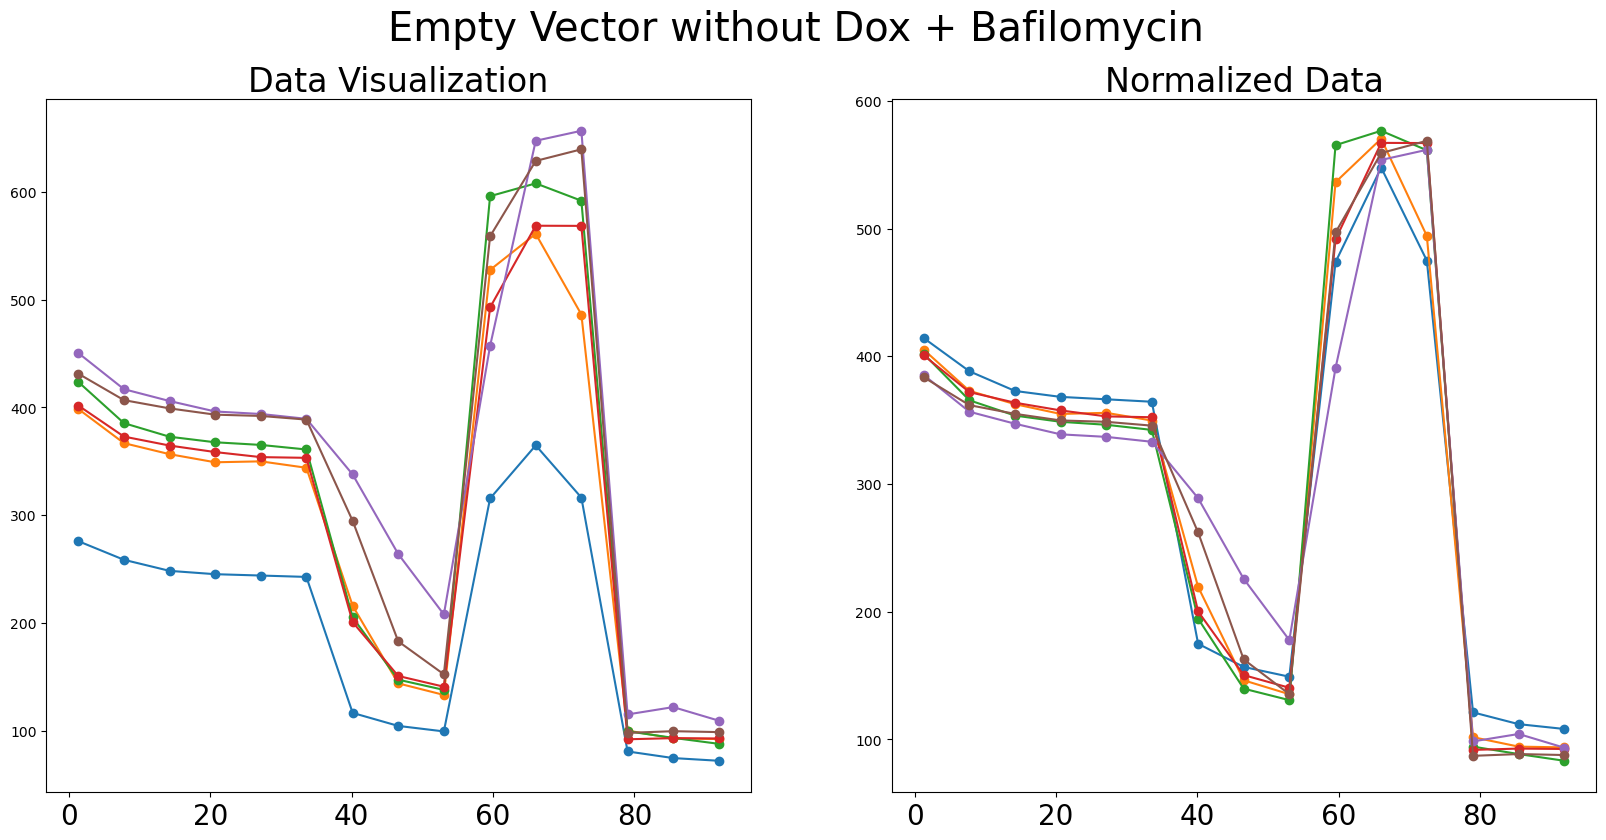

<Figure size 1200x800 with 0 Axes>

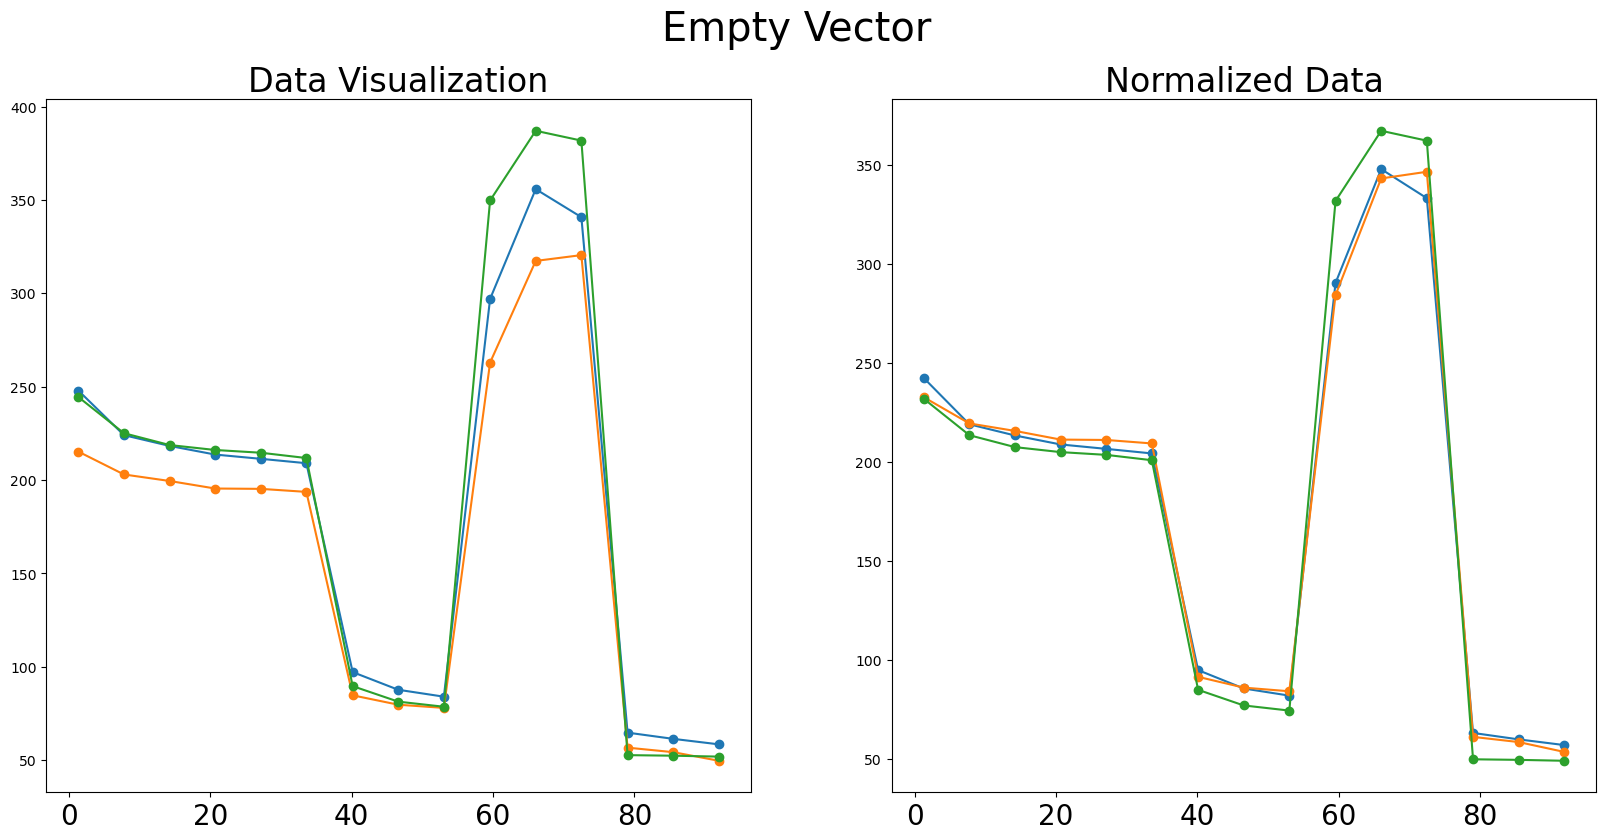

<Figure size 1200x800 with 0 Axes>

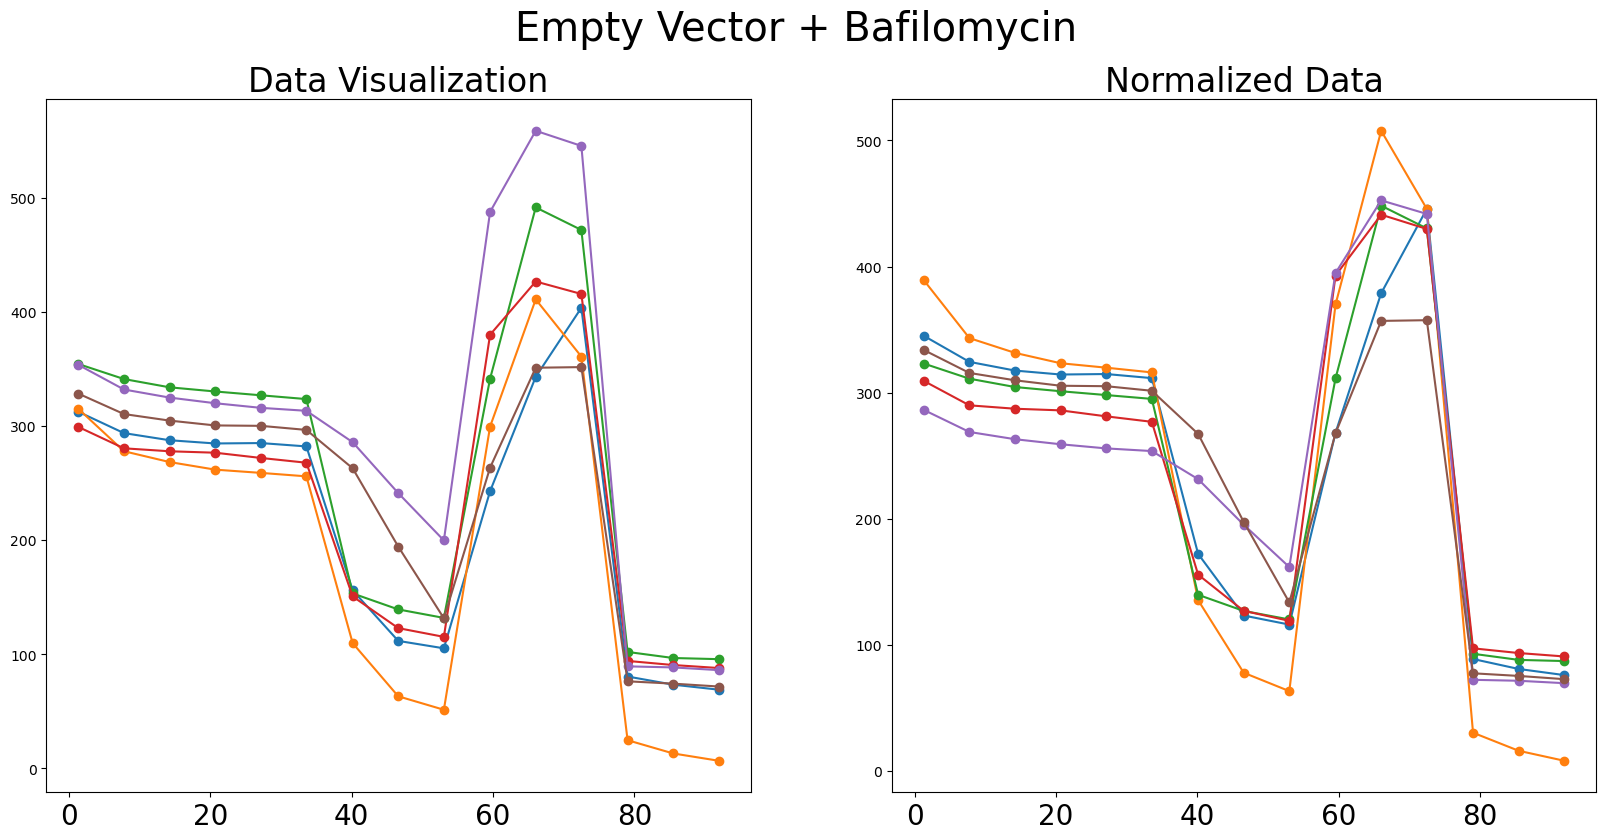

<Figure size 1200x800 with 0 Axes>

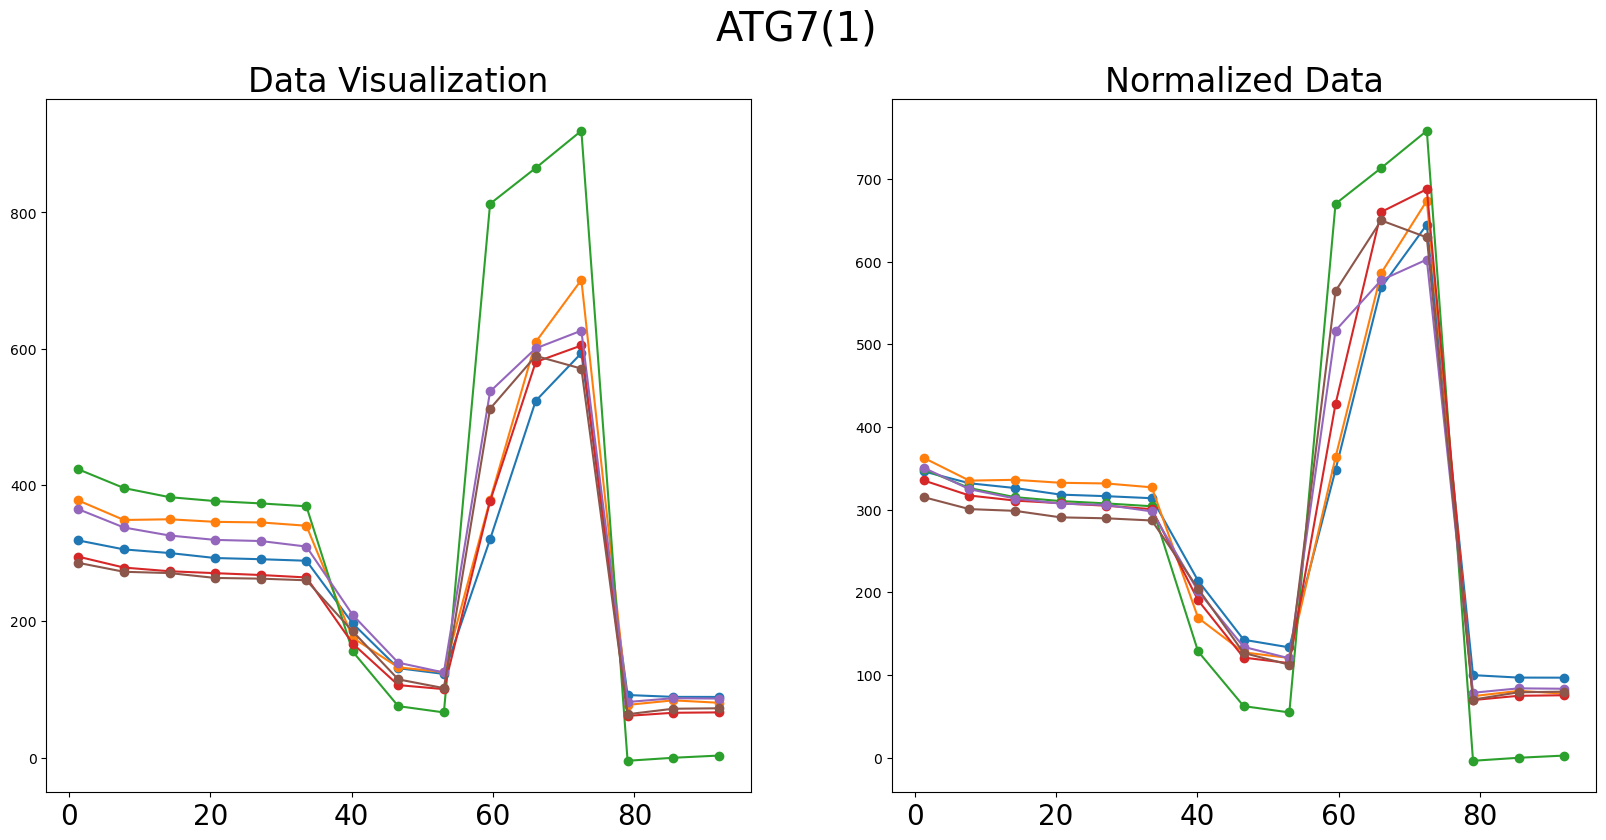

<Figure size 1200x800 with 0 Axes>

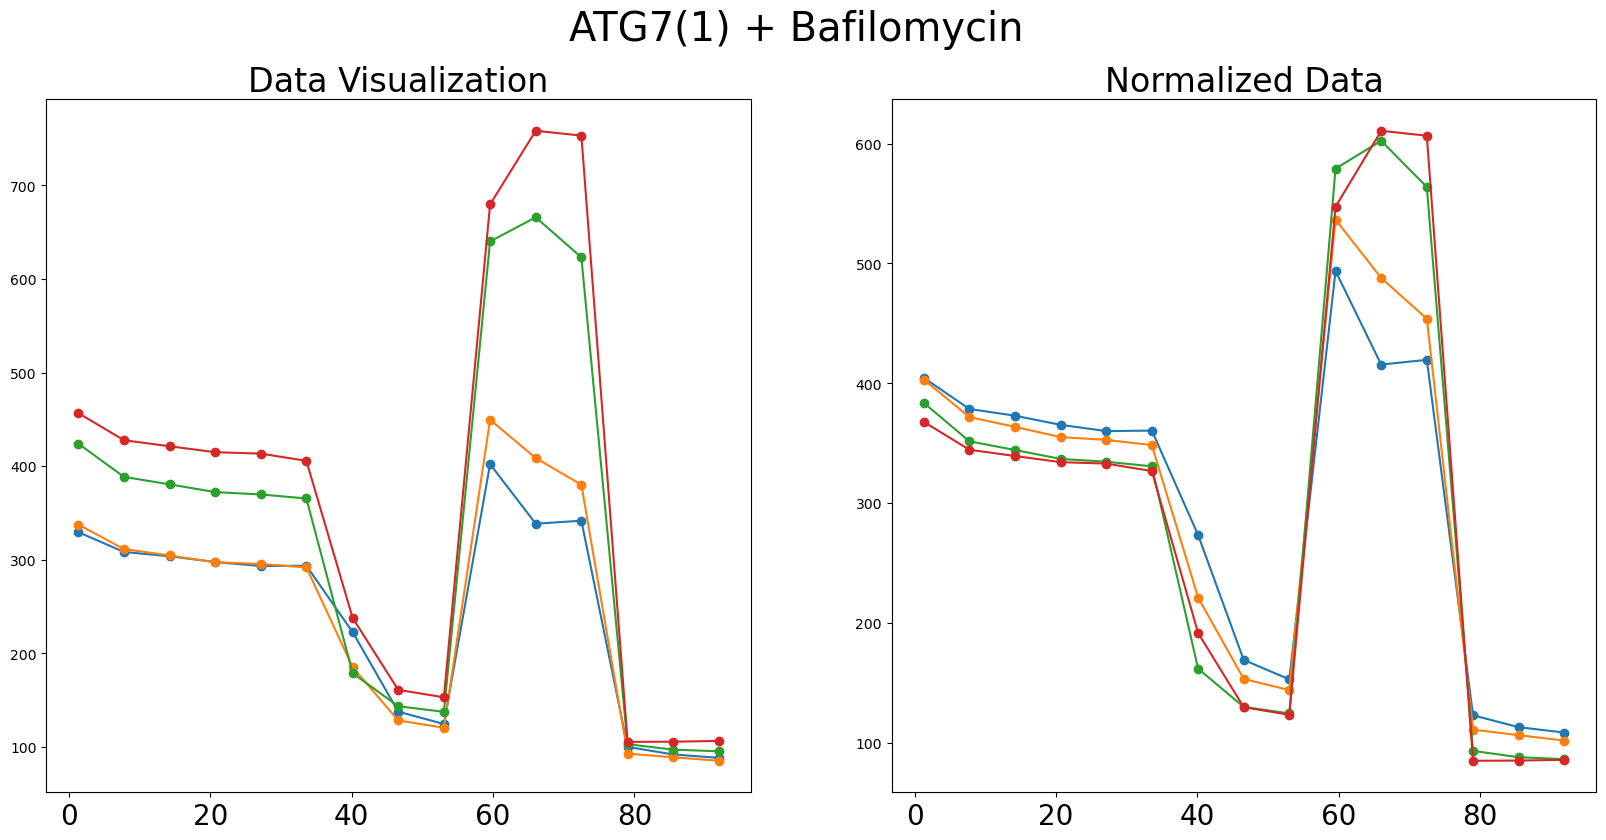

<Figure size 1200x800 with 0 Axes>

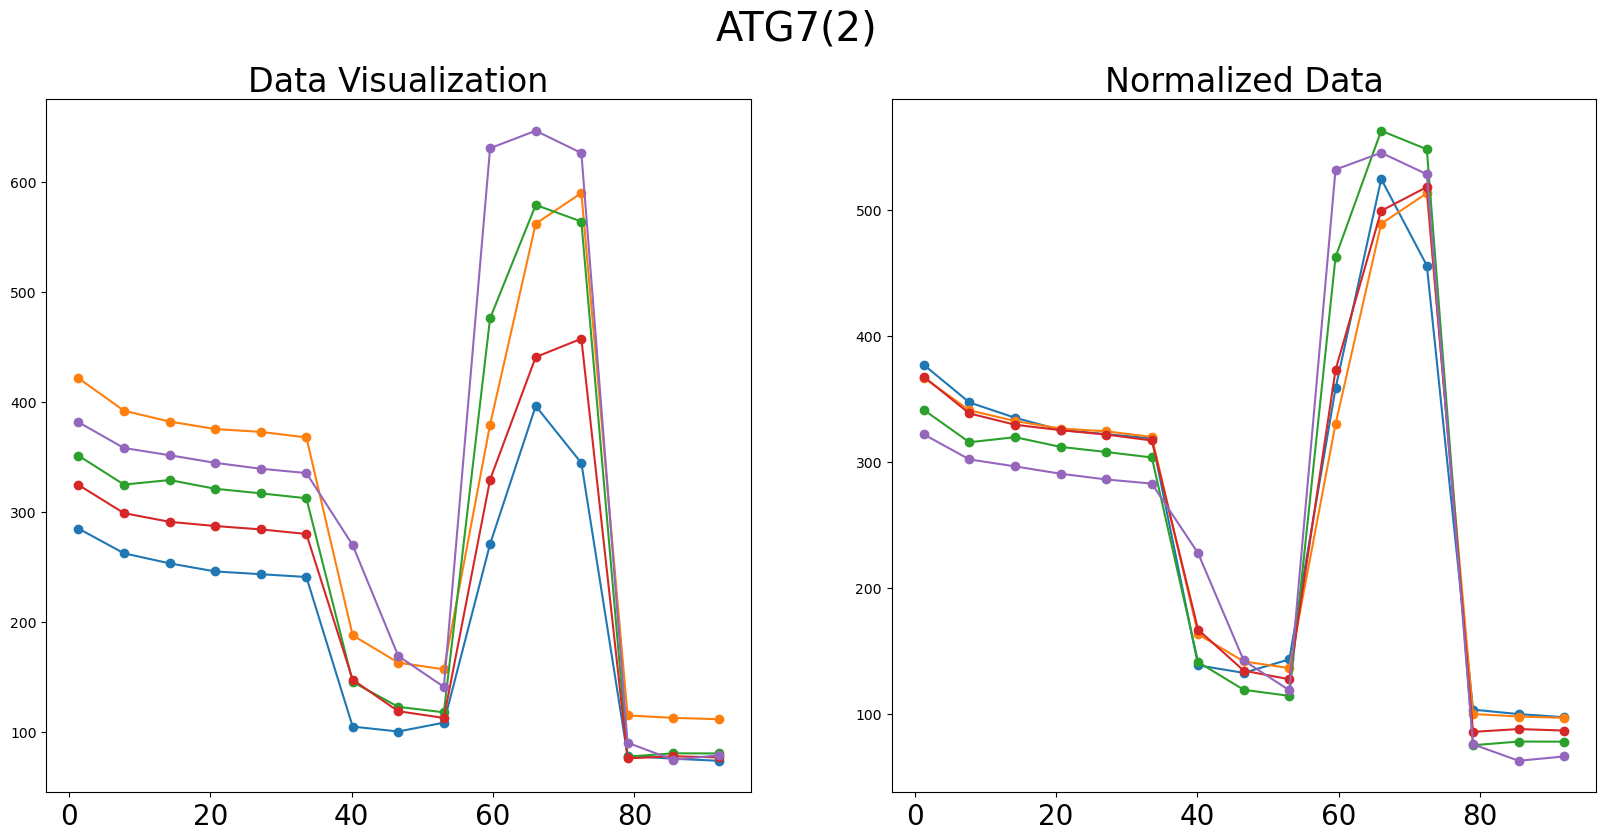

<Figure size 1200x800 with 0 Axes>

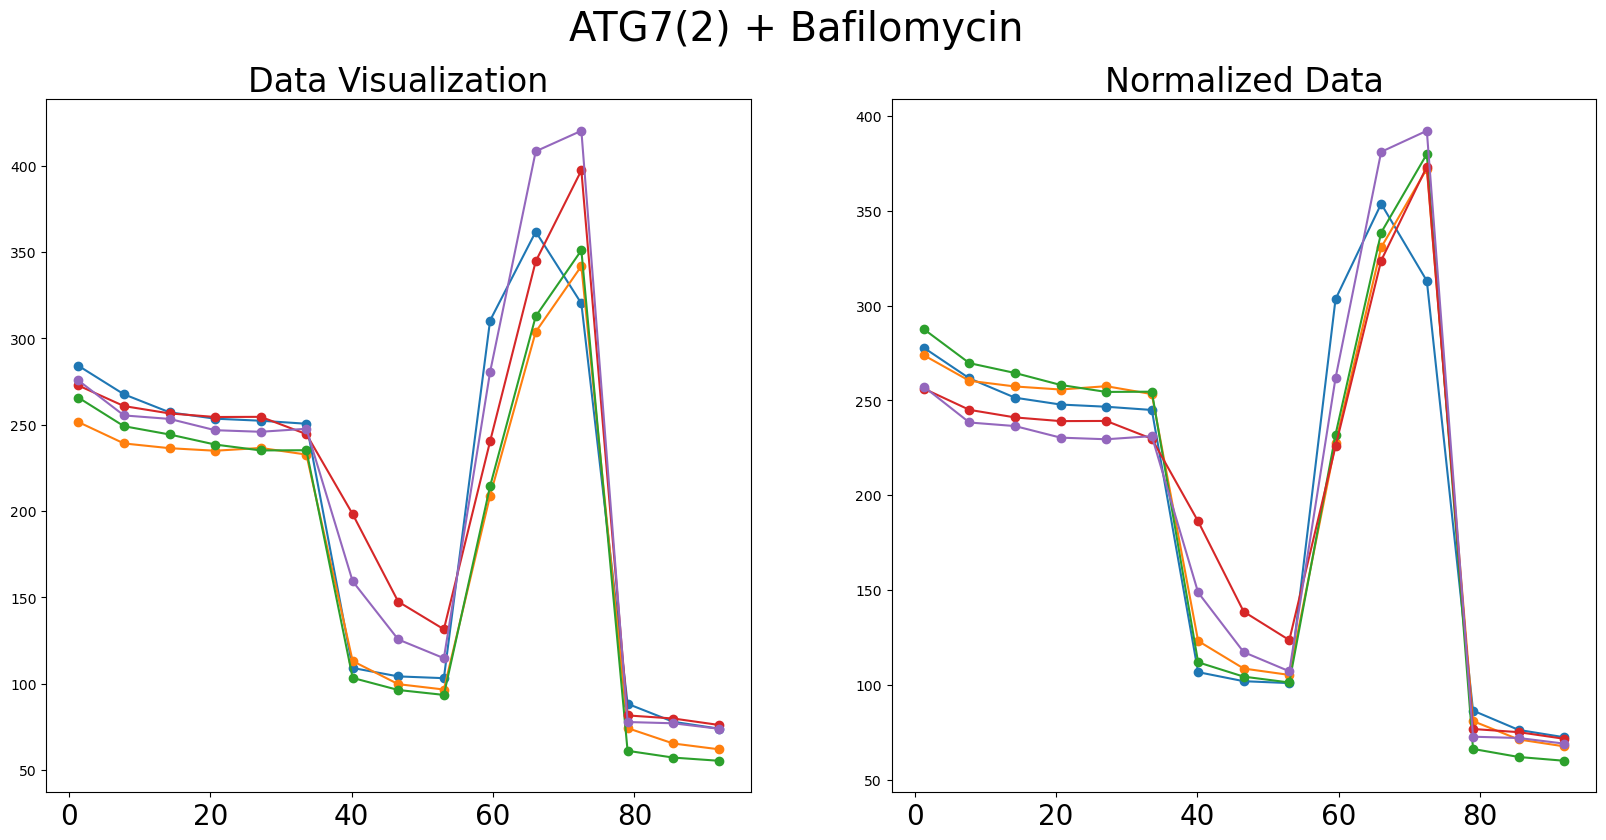

<Figure size 1200x800 with 0 Axes>

In [9]:
#Normalization of the data after removing bad wells
all_data = [[ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ocr_normalized['Time'], ocr_normalized[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ocr_normalized[data[0]].mean()
    general_mean = ocr_normalized[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ocr_normalized[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ocr_normalized['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

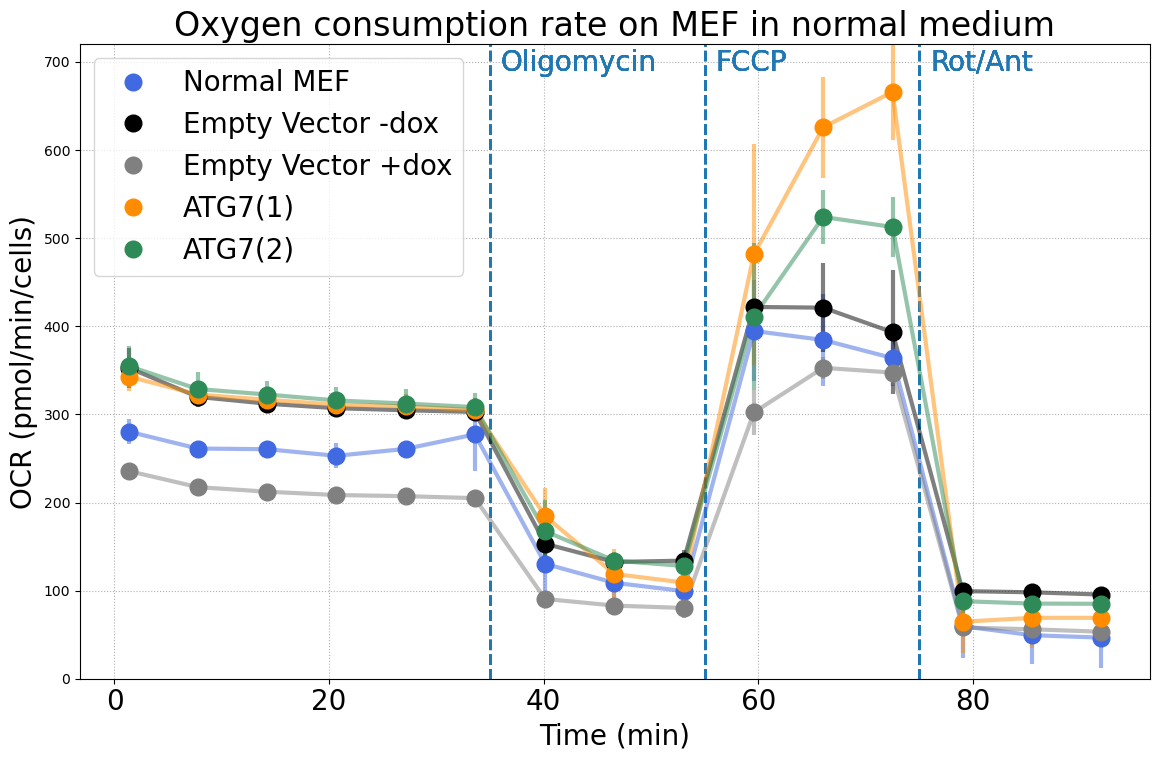

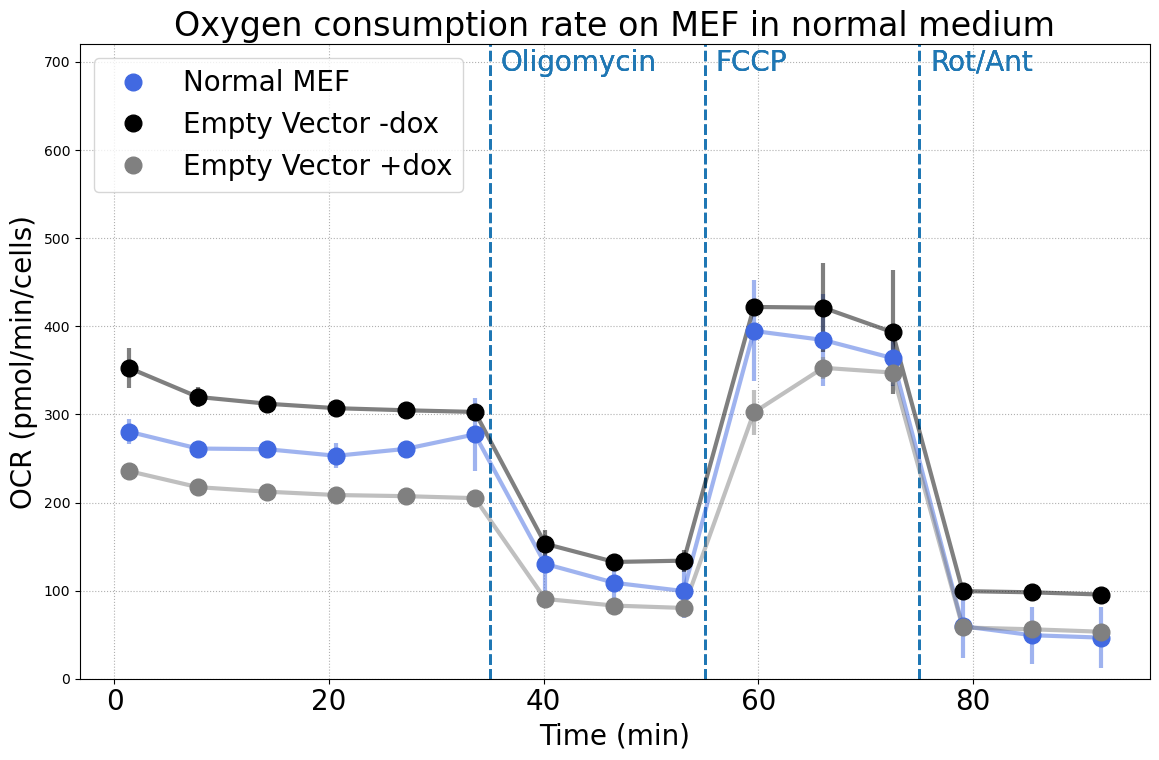

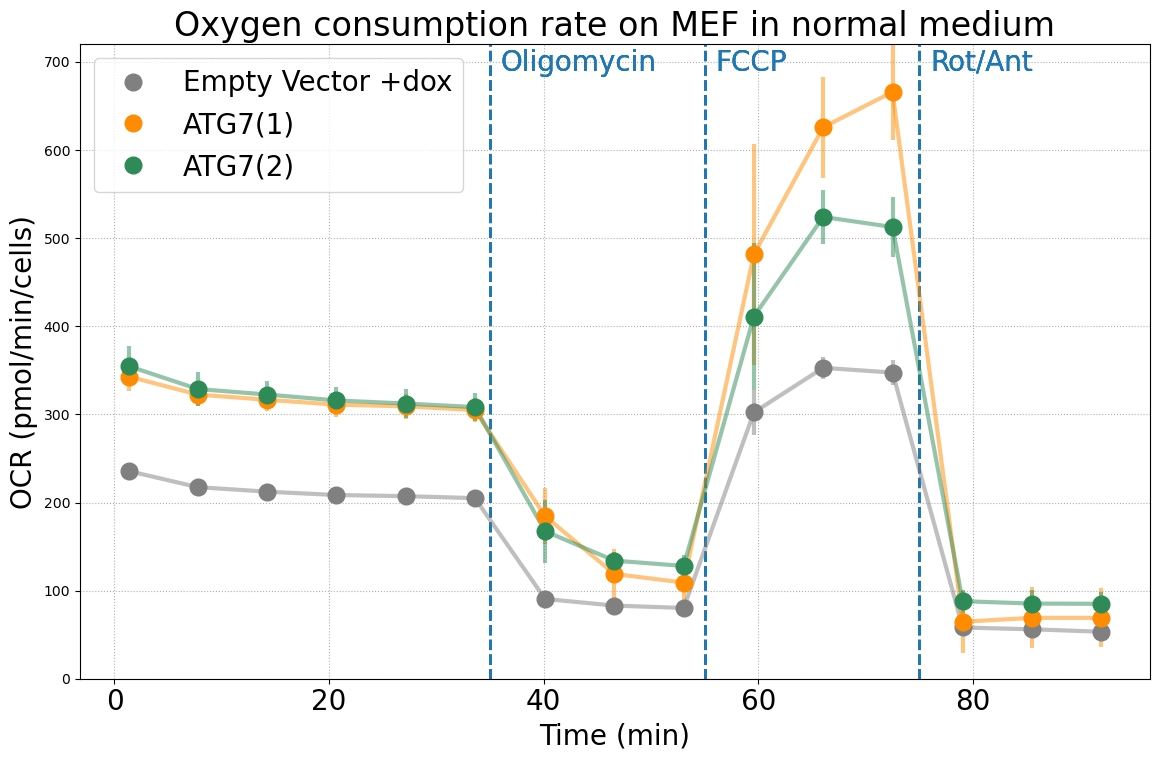

<Figure size 1200x800 with 0 Axes>

In [17]:
##WITHOUT BAFILOMYCIN
all_data = [[normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[normal, 'Normal MEF', "royalblue"],
              [ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],            
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_normalized[data[0]].mean()
        general_mean = ocr_normalized[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_normalized[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_normalized['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_normalized['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 690, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 690, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 690, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF in normal medium')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 720])
        matplotlib.pyplot.tight_layout()

    plt.show()
    plt.clf()

In [12]:
#data preparation
sample_labels = wt2, wt1, ev, ev_nodox
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue"

stats_data_basal = ocr_normalized.iloc[:6, :]
stats_data_max = ocr_normalized.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :5]

    path = 'ATG7/MEF/Seahorse_results/seahorse_OCR/dataframes_for_input/'
    file_name = f'ocr_{experimentN}_df_dmso_{info}.csv'
#     df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Empty Vector -dox  Empty Vector +dox     ATG7(1)  ATG7(2)
0            353.700         235.810000  343.921667  352.492
1            320.210         217.320000  323.063333  326.956
2            312.395         212.116667  316.940000  321.084
3            307.240         208.343333  311.401667  314.528
4            304.870         207.033333  309.503333  310.986
5            302.805         204.763333  305.263333  306.962
   Empty Vector -dox  Empty Vector +dox     ATG7(1)  ATG7(2)
0            422.230         303.156667  489.325000  416.934
1            419.490         353.346667  628.073333  524.626
2            391.035         347.630000  669.281667  516.106


# +BAF

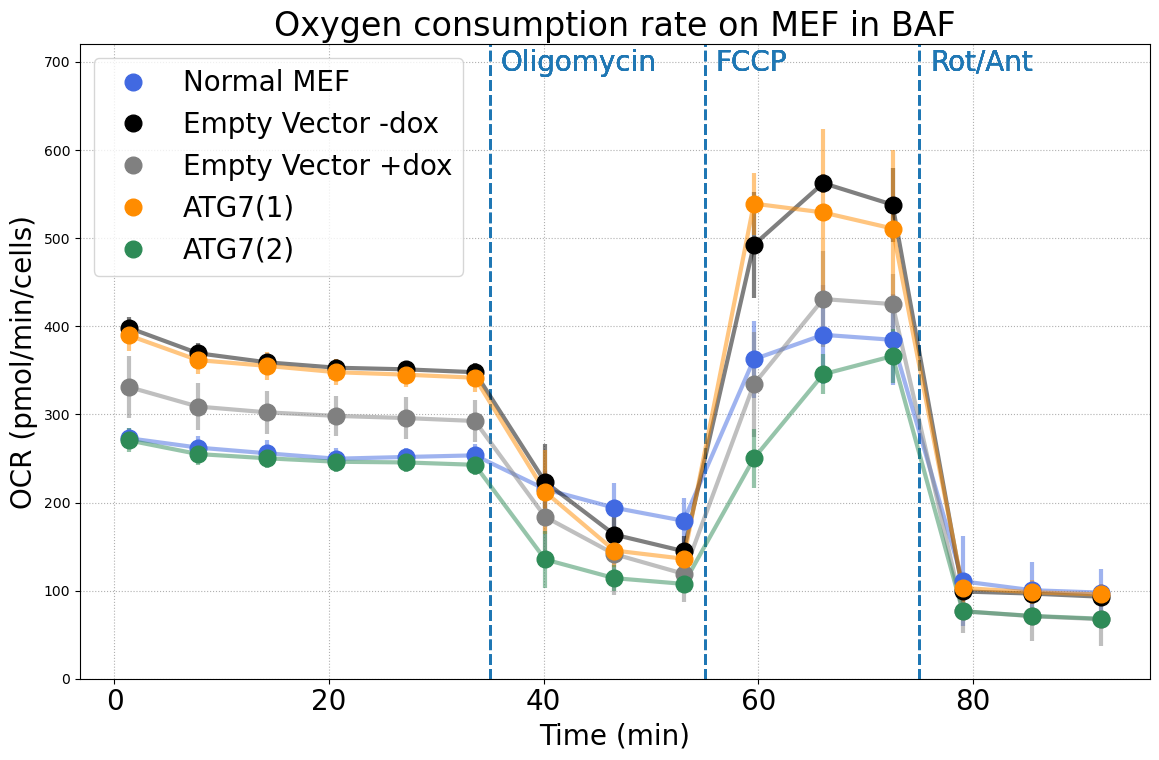

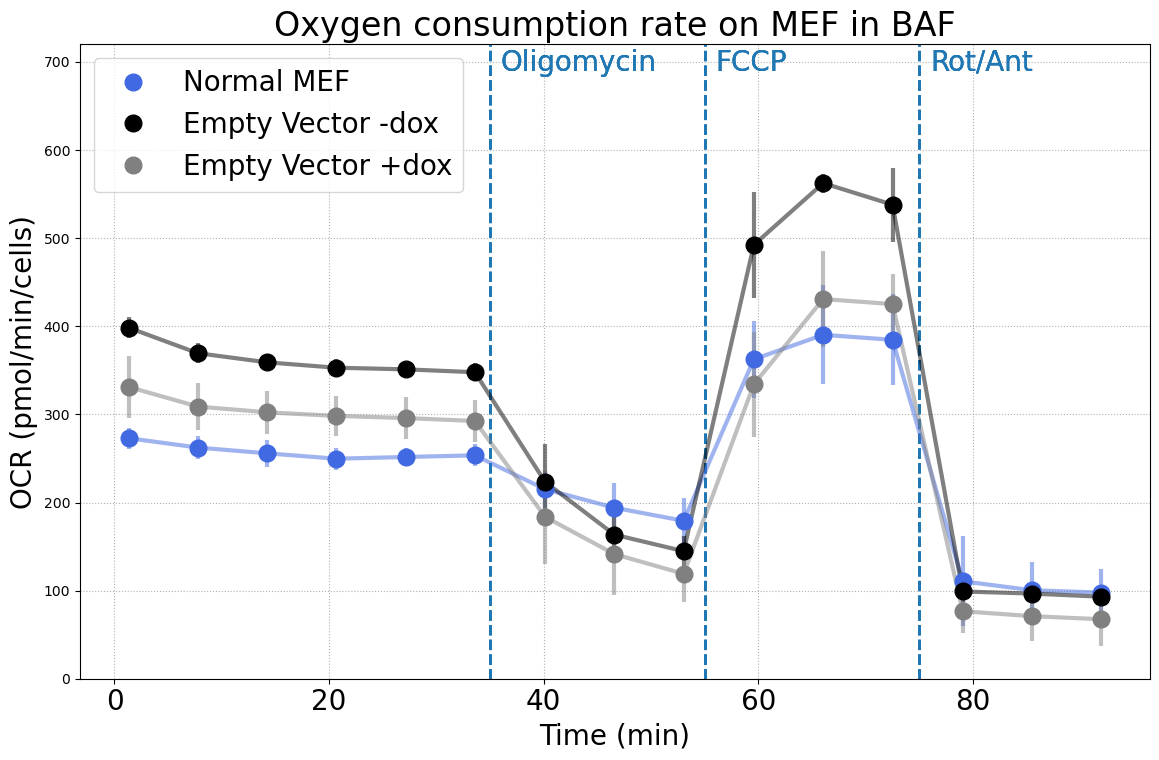

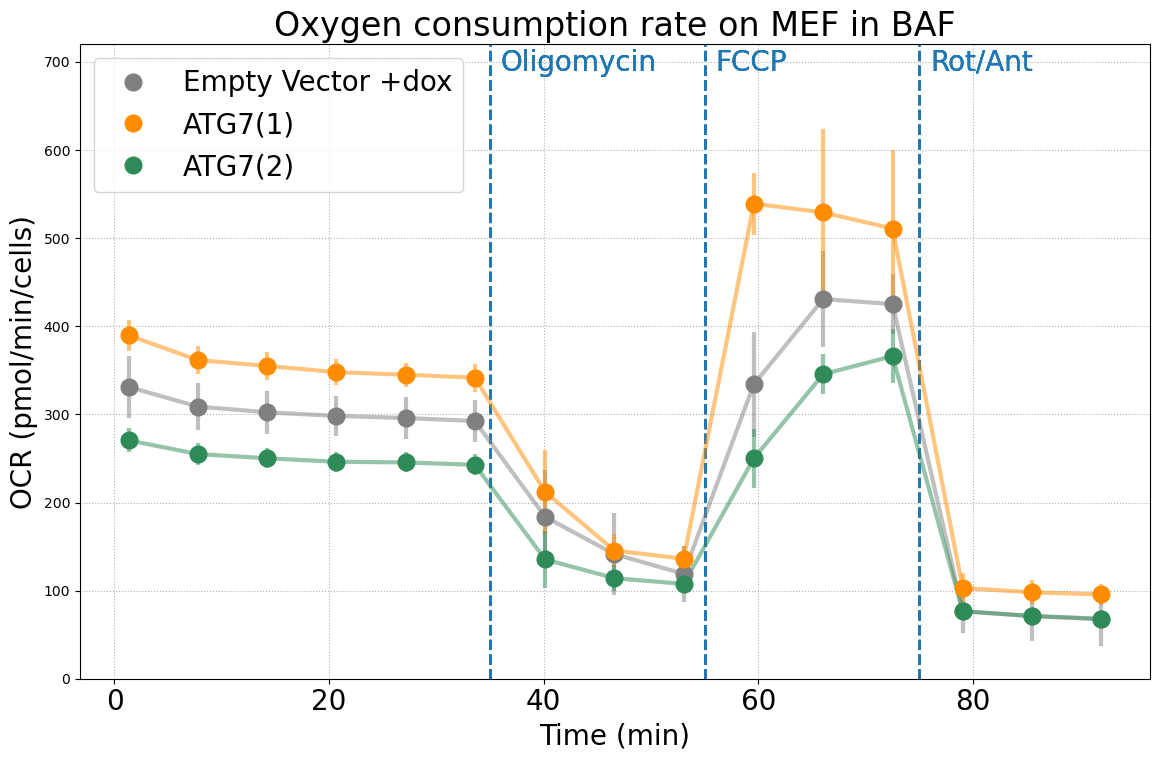

<Figure size 1200x800 with 0 Axes>

In [19]:
##WITH BAFILOMYCIN
all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],            
            [wt2_baf, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_normalized[data[0]].mean()
        general_mean = ocr_normalized[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_normalized[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_normalized['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_normalized['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 690, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 690, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 690, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF in BAF')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 720])
        matplotlib.pyplot.tight_layout()

    plt.show()
    plt.clf()

In [16]:
#data preparation
sample_labels = wt2_baf, wt1_baf, ev_baf, ev_nodox_baf
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue"

stats_data_basal = ocr_normalized.iloc[:6, :]
stats_data_max = ocr_normalized.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :5]

    path = 'ATG7/MEF/Seahorse_results/seahorse_OCR/dataframes_for_input/'
    file_name = f'ocr_{experimentN}_df_baf_{info}.csv'
#     df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Empty Vector -dox  Empty Vector +dox   ATG7(1)  ATG7(2)
0         396.855000         327.343333  387.0700  269.898
1         367.860000         306.130000  359.1200  254.376
2         357.838333         299.725000  352.6425  249.526
3         351.620000         295.795000  345.6600  245.604
4         349.776667         293.323333  343.0800  244.848
5         346.443333         290.045000  339.2650  242.104
   Empty Vector -dox  Empty Vector +dox   ATG7(1)  ATG7(2)
0         491.273333         336.016667  542.9600  250.848
1         563.088333         430.571667  542.9725  346.198
2         543.165000         425.076667  524.6900  366.068
